# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [122]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = requests.get(city_url).json()['coord']['lat']
        city_lng = requests.get(city_url).json()['coord']['lon']
        city_max_temp = requests.get(city_url).json()['main']['temp_max']
        city_humidity = requests.get(city_url).json()['main']['humidity']
        city_clouds = requests.get(city_url).json()['clouds']['all']
        city_wind = requests.get(city_url).json()['wind']['speed']
        city_country = requests.get(city_url).json()['sys']['country']
        city_date = requests.get(city_url).json()['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | tourlaville
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | nantucket
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | jimma
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | cartagena
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | dongola
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | puerto leguizamo
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          419
Lat           419
Lng           419
Max Temp      419
Humidity      419
Cloudiness    419
Wind Speed    419
Country       419
Date          419
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,299.18,65,94,7.20,CK,1699495464
1,tourlaville,49.6383,-1.5664,280.83,87,75,4.63,FR,1699495713
2,stanley,54.8680,-1.6985,278.43,92,75,1.54,GB,1699495198
3,port-aux-francais,-49.3500,70.2167,278.91,94,100,16.40,TF,1699495730
4,grytviken,-54.2811,-36.5092,276.66,77,100,1.08,GS,1699495738


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,299.18,65,94,7.20,CK,1699495464
1,tourlaville,49.6383,-1.5664,280.83,87,75,4.63,FR,1699495713
2,stanley,54.8680,-1.6985,278.43,92,75,1.54,GB,1699495198
3,port-aux-francais,-49.3500,70.2167,278.91,94,100,16.40,TF,1699495730
4,grytviken,-54.2811,-36.5092,276.66,77,100,1.08,GS,1699495738


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

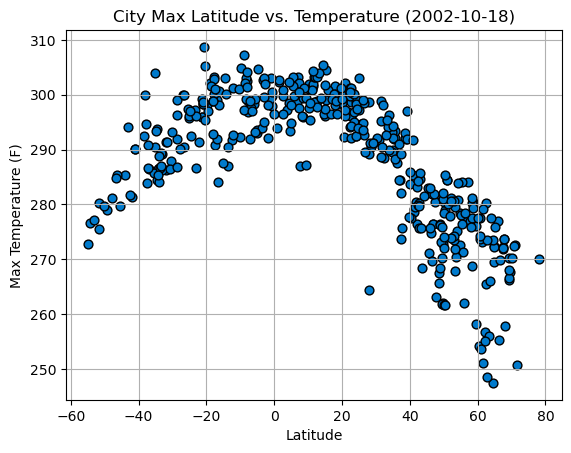

In [70]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat', y='Max Temp', kind='scatter', color='#007ACC', s=40, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2002-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

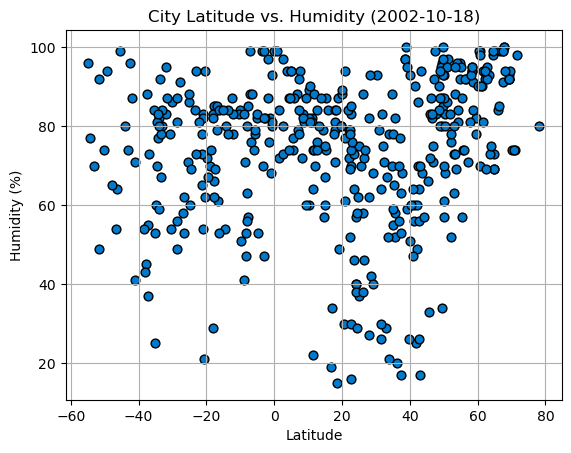

In [72]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x='Lat', y='Humidity', kind='scatter', s=40, color='#007ACC', marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2002-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

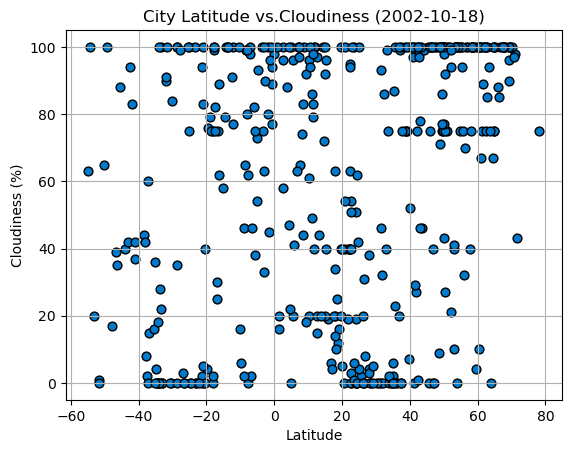

In [73]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x='Lat', y='Cloudiness', kind='scatter', s=40, color='#007ACC', marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs.Cloudiness (2002-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

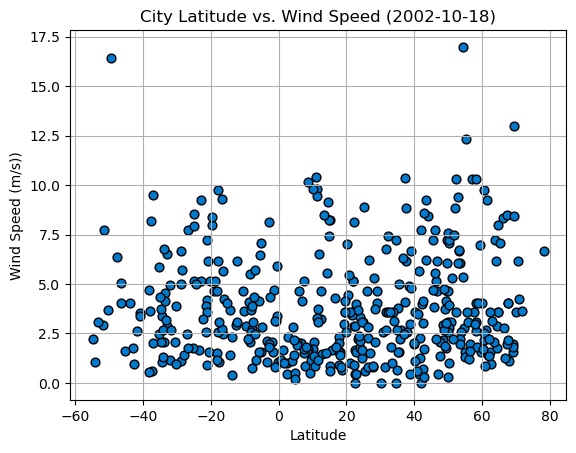

In [74]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat', y='Wind Speed', kind='scatter', s=40, color='#007ACC', marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2002-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s))')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots
def linear_regression_plot(df, x_column, y_column, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(df[x_column], df[y_column])

    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=x_column, y=y_column, ci=None, line_kws={'color': 'red'}, scatter_kws={'s': 50, 'alpha': 0.6})
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    equation = f'Y = {slope:.2f}X + {intercept:.2f}'
    plt.text(0.1, 0.1, equation, fontsize=12, color='red', transform=plt.gca().transAxes)
  
    print(f'The r-value is {r_value}')
    plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tourlaville,49.6383,-1.5664,280.83,87,75,4.63,FR,1699495713
2,stanley,54.8680,-1.6985,278.43,92,75,1.54,GB,1699495198
6,nantucket,41.2835,-70.0995,279.18,60,0,5.66,US,1699495757
8,jimma,7.6667,36.8333,287.01,94,65,0.86,ET,1699495774
10,cartagena,10.3997,-75.5144,301.94,89,20,2.06,CO,1699495791


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,299.18,65,94,7.20,CK,1699495464
3,port-aux-francais,-49.3500,70.2167,278.91,94,100,16.40,TF,1699495730
4,grytviken,-54.2811,-36.5092,276.66,77,100,1.08,GS,1699495738
5,puerto ayora,-0.7393,-90.3518,297.90,93,94,3.13,EC,1699495752
7,waitangi,-43.9535,-176.5597,285.27,80,40,4.02,NZ,1699495766


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8634644733574321


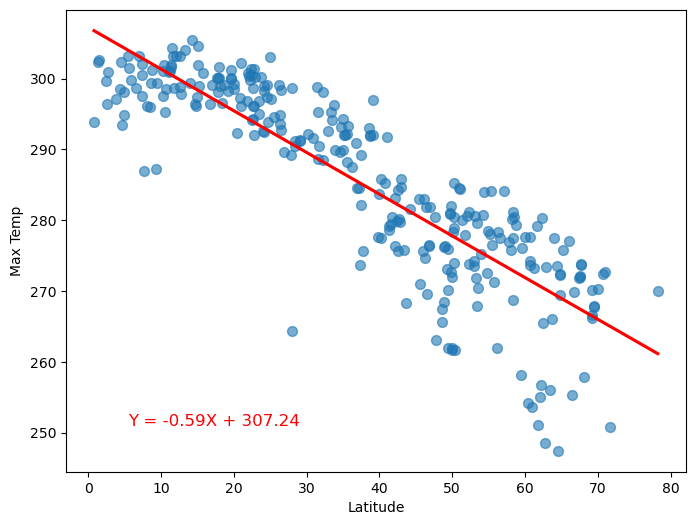

In [112]:
# Linear regression on Northern Hemisphere
linear_regression_plot(df=northern_hemi_df, x_column='Lat', y_column='Max Temp', x_label='Latitude', y_label='Max Temp', title = None) 

The r-value is 0.7287724847521561


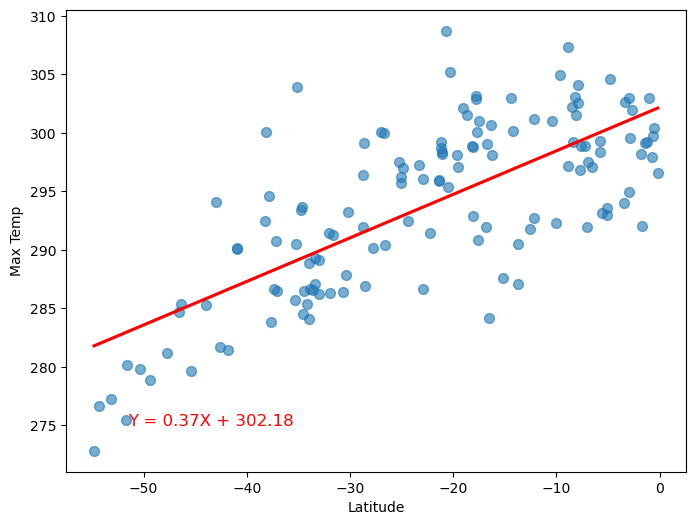

In [113]:
# Linear regression on Southern Hemisphere
linear_regression_plot(df=southern_hemi_df, x_column='Lat', y_column='Max Temp', x_label='Latitude', y_label='Max Temp', title = None) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.23930171510527784


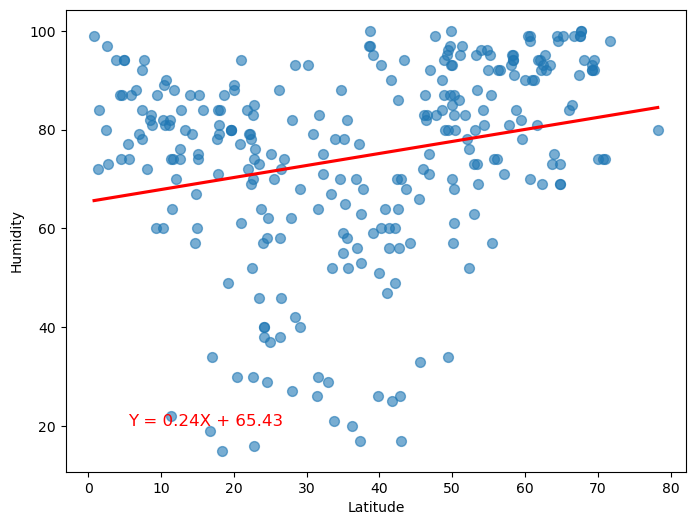

In [114]:
# Northern Hemisphere
linear_regression_plot(df=northern_hemi_df, x_column='Lat', y_column='Humidity', x_label='Latitude', y_label='Humidity', title = None) 

The r-value is 0.11178199243335561


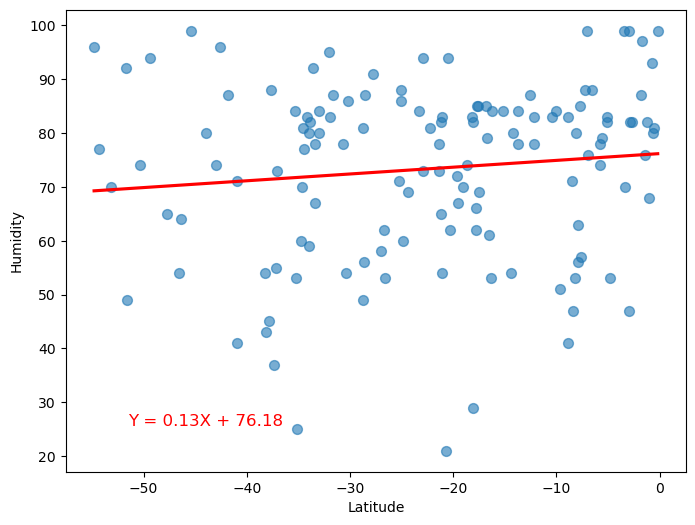

In [115]:
# Southern Hemisphere
linear_regression_plot(df=southern_hemi_df, x_column='Lat', y_column='Humidity', x_label='Latitude', y_label='Humidity', title = None) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3321561779172429


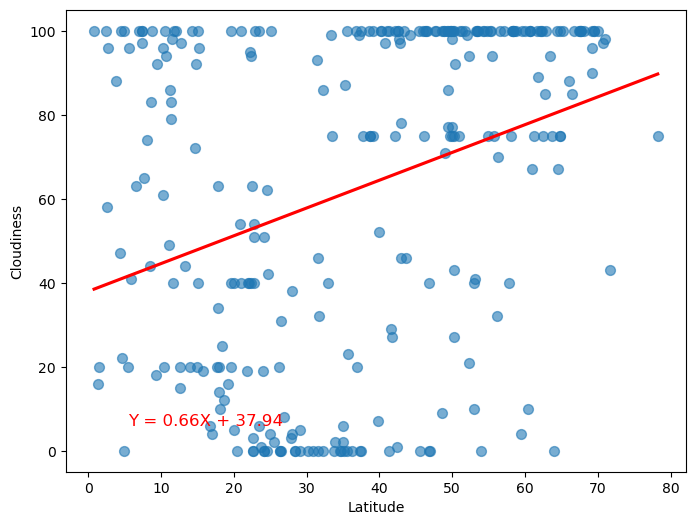

In [116]:
# Northern Hemisphere
linear_regression_plot(df=northern_hemi_df, x_column='Lat', y_column='Cloudiness', x_label='Latitude', y_label='Cloudiness', title = None) 

The r-value is 0.33370916267190487


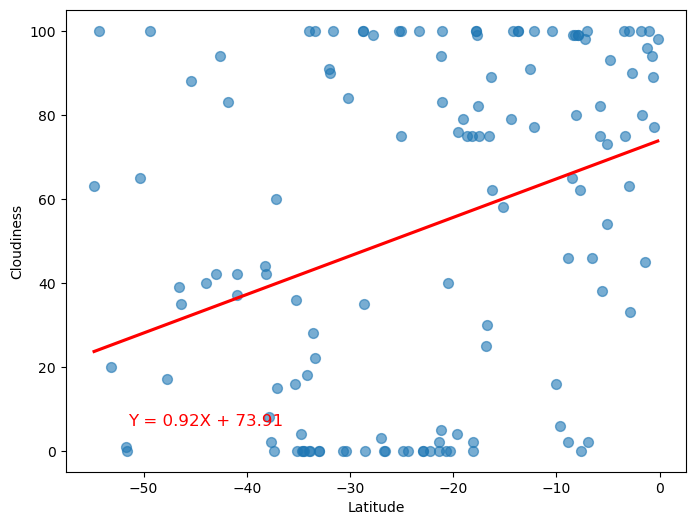

In [117]:
# Southern Hemisphere
linear_regression_plot(df=southern_hemi_df, x_column='Lat', y_column='Cloudiness', x_label='Latitude', y_label='Cloudiness', title = None) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.19378365858930374


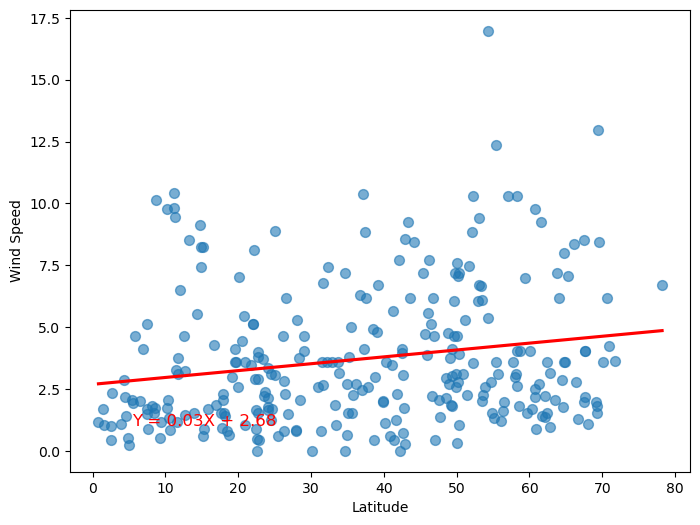

In [118]:
# Northern Hemisphere
linear_regression_plot(df=northern_hemi_df, x_column='Lat', y_column='Wind Speed', x_label='Latitude', y_label='Wind Speed', title = None) 

The r-value is -0.10354763026426002


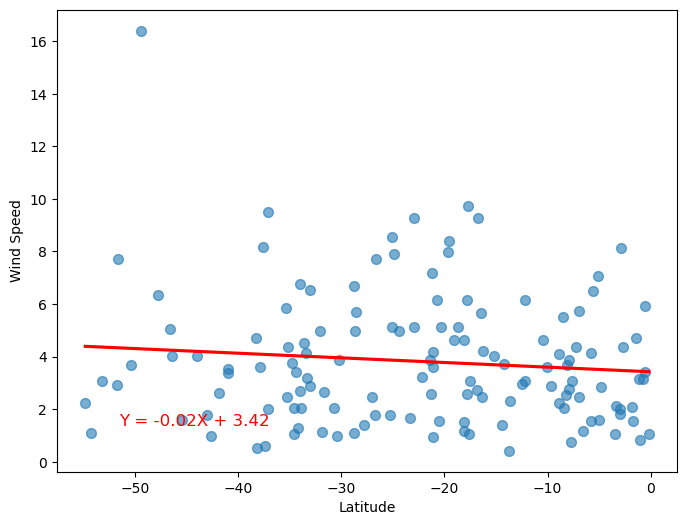

In [119]:
# Southern Hemisphere
linear_regression_plot(df=southern_hemi_df, x_column='Lat', y_column='Wind Speed', x_label='Latitude', y_label='Wind Speed', title = None) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

######
There is a negative linear relationship of the latitude and max temperature in the northern hemisphere.  
Meanwhile, the southern hemisphere has a positive linear relationship with the latitude and
max temperature.  As for the humidity and latitude, both hemispheres don't seem to have a correlation between these two components.  
There is also no relationship between the cloudiness and latitude for both hemispheres of a city as the plots are all scattered in the diagram.  
As for wind speed and latitude, both hemispheres, they also have no correlation as most of the cities have about the same wind speed
######